# Regular Expression Basics

Corresponds to DataQuest advanced data cleaning session.

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from pathlib import Path

In [3]:
data_path = Path.home() / "datasets" / "tabular_practice"

hn = pd.read_csv(data_path / "hacker_news.csv")
titles = hn["title"]

We'd like to answer these questions:

* There is some set of words around "email" we'd like to match
* How many titles contain at least one match?
* Extract all matches from all titles and compute a histogram

In [5]:
import re

# We'd like to match all of these variations:
email_tests = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail',
              'e-mail', 'eMail', 'E-Mail', 'EMAIL', 'emails', 'Emails',
              'E-Mails'])

# This regex does the job, together with the re.I flag (ignores case for all letters)
pattern = r"\be[- ]?mails?\b"
print(f"Matches {email_tests.str.contains(pattern, flags=re.I).sum()} of {len(email_tests)}")

Matches 12 of 12


Explanation:

* "\b" is a word boundary anchor: We do not want to match "email" and variations as parts of longer words
* "[- ]" matches "-" or " "; and "?" is a quantifier (0 or 1)
* `flags=re.I` means that any letter also matches the other case (so "e" matches "[eE]"). Note this applies to all letters

In [7]:
email_bool = titles.str.contains(pattern, flags=re.I)
print(f"Number of titles containing 'email' like words: {email_bool.sum()}")

Number of titles containing 'email' like words: 141


In [8]:
titles[email_bool].head(20)

120     Show HN: Send an email from your shell to your...
162     Computer Specialist Who Deleted Clinton Emails...
175                                       Email Apps Suck
262     Emails Show Unqualified Clinton Foundation Don...
314         Disposable emails for safe spam free shopping
333                          Inky: Secure Email Made Easy
1362    Ask HN: Doing cold emails? helps us prove this...
1751    Protect yourself from spam, bots and phishing ...
1775    From Email Introductions to Addressing Diversi...
1901    Police Emails About Ahmed Mohamed: 'This Is Wh...
1957                  Email newsletters are the new zines
2019    Emails from a CEO Who Just Has a Few Changes t...
2422                   Ashley Madison hack treating email
2686         Ask HN: Weather forecast in your email daily
3182    Validating Email Addresses with a Regex? Do Yo...
3380           Ask HN: How do we solve the email problem?
3562    Yale Students Demand Resignations from Faculty...
3603    Show H

We can use `str.extract` along with a caption block in order to extract the first matched string. However, in order to extract several matches, we need to use `str.extractall`.

In [10]:
pattern_caption = r"\b(e[- ]?mails?)\b"
all_matches = titles.str.extractall(pattern_caption, flags=re.I)
all_matches.head(40)

,,0
,match,
120,0,email
162,0,Emails
175,0,Email
262,0,Emails
314,0,emails
333,0,Email
1362,0,emails
1751,0,email
1775,0,Email


<Axes: ylabel='0'>

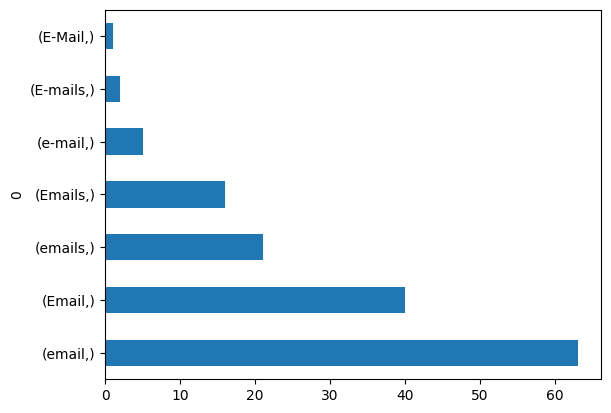

In [11]:
# Histogram over different numbers of variations

all_matches.value_counts().plot(kind="barh")

Lookaheads are a useful advanced feature:

* `zzz(?=abc)` matches "zzz" only if followed by "abc"
* `zzz(?!abc)` matches "zzz" only if not followed by "abc"
* `(?<=abc)zzz` matches "zzz" only if preceeded by "abc"
* `(?<!abc)zzz` matches "zzz" only if not preceeded by "abc"

Here, "abc" and "zzz" can be arbitrary regex's.

Say, we'd like to match all mentions of the C programming language in the titles.

In [13]:
# First attempt
pattern = r"\b[cC]\b"
titles[titles.str.contains(pattern)].head(40)

14                 Custom Deleters for C++ Smart Pointers
221                        Lisp, C++: Sadness in my heart
222                  MemSQL (YC W11) Raises $36M Series C
354     VW C.E.O. Personally Apologized to President O...
366                      The new C standards are worth it
445           Moz raises $10m Series C from Foundry Group
509     BDE 3.0 (Bloomberg's core C++ library): Open S...
522          Fuchsia: Micro kernel written in C by Google
550     How to Become a C.E.O.? The Quickest Path Is a...
1283    A lightweight C++ signals and slots implementa...
1308            Show HN: Yupp, yet another C preprocessor
1327                     The C standard formalized in Coq
1366                          GNU C Library 2.23 released
1430    Cysignals: signal handling (SIGINT, SIGSEGV, )...
1501                        Fun with Lambdas: C++14 Style
1621                        SDCC  Small Device C Compiler
1673      C++ Coroutines  a negative overhead abstraction
1950    Rewrit

There are some problems:

* Matches "C++" and "C#", different languages
* Matches "C.E.O"
* Matches "Series C"

In [15]:
# Second attempt
pattern = r"\b[cC]\b[^.+#]"
titles[titles.str.contains(pattern)].head(40)

366                       The new C standards are worth it
445            Moz raises $10m Series C from Foundry Group
522           Fuchsia: Micro kernel written in C by Google
1308             Show HN: Yupp, yet another C preprocessor
1327                      The C standard formalized in Coq
1366                           GNU C Library 2.23 released
1430     Cysignals: signal handling (SIGINT, SIGSEGV, )...
1621                         SDCC  Small Device C Compiler
1950     Rewriting a Ruby C Extension in Rust: How a Na...
2196     MyHTML  HTML Parser on Pure C with POSIX Threa...
2590     Phalcon  PHP framework delivered as a C extension
3251              Transactional Memory Support for C [pdf]
4046     Kitten: compile to C, stack-based functional p...
4296                  C strings with implicit length field
4577     Ask HN: Which linux/unix C++/C IDE are you using?
4755            Amazon bans the sale of rogue USB-C cables
5260     Incorporating and accessing binary data into a.

In [19]:
# Series C is still matched
filt_titles = titles[titles.str.contains(pattern)]
filt_titles[filt_titles.str.contains("Series C")]

445    Moz raises $10m Series C from Foundry Group
Name: title, dtype: object

In [26]:
# Also, we'd miss "C." at the end of a sentence
print(re.search(pattern, "My favourite language is C."))

None


In [30]:
# Third attempt, using lookaheads
pattern = r"(?<!Series )\b[Cc]\b((?![+.#])|\.$)"
titles[titles.str.contains(pattern)].head(40)

/var/folders/kj/trnztfjn67j9by8wztm_6y8m0000gn/T/ipykernel_29984/436801729.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  titles[titles.str.contains(pattern)].head(40)


366                      The new C standards are worth it
522          Fuchsia: Micro kernel written in C by Google
1308            Show HN: Yupp, yet another C preprocessor
1327                     The C standard formalized in Coq
1366                          GNU C Library 2.23 released
1430    Cysignals: signal handling (SIGINT, SIGSEGV, )...
1621                        SDCC  Small Device C Compiler
1950    Rewriting a Ruby C Extension in Rust: How a Na...
2196    MyHTML  HTML Parser on Pure C with POSIX Threa...
2590    Phalcon  PHP framework delivered as a C extension
3098               A Superconductor That Works at -70 Â°C
3251             Transactional Memory Support for C [pdf]
3795    Quotes from Jean-Paul Sartres Programming in A...
4046    Kitten: compile to C, stack-based functional p...
4073                               Why I Write Games in C
4296                 C strings with implicit length field
4577    Ask HN: Which linux/unix C++/C IDE are you using?
4755          

**Note**: For a positive lookahead, the match does not include the string matched to the lookahead. We could get the same effect by using a match group on the main expression.

With a backreference, we can refer to the string matched by an earlier capture group, by using `\1`, `\2`, ...

In [31]:
# Match titles with repeated words
pattern = r"\b([\w]+)\b \1\b"
titles[titles.str.contains(pattern)]

/var/folders/kj/trnztfjn67j9by8wztm_6y8m0000gn/T/ipykernel_29984/310214743.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  titles[titles.str.contains(pattern)]


3103                  Silicon Valley Has a Problem Problem
3177                Wire Wire: A West African Cyber Threat
3179                         Flexbox Cheatsheet Cheatsheet
4798                            The Mindset Mindset (2015)
7277     Valentine's Day Special: Bye Bye Tinder, Flirt...
10372    Mcdonalds copying cyriak  cows cows cows in th...
11576                                    Bang Bang Control
11902          Cordless Telephones: Bye Bye Privacy (1991)
12698          Solving the the Monty-Hall-Problem in Swift
15050    Bye Bye Webrtc2SIP: WebRTC with Asterisk and A...
15840          Intellij-Rust Rust Plugin for IntelliJ IDEA
Name: title, dtype: object